In [1]:
import numpy as np
import matplotlib.pyplot as plt

def spline_cubico_natural(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    n = len(x)
    
    a = y.copy()
    h = x[1:] - x[:-1]
    alpha = np.zeros(n-1)
    for i in range(1, n-1):
        alpha[i] = 3.0 * ((a[i+1] - a[i]) / h[i] - (a[i] - a[i-1]) / h[i-1])
    
    l = np.ones(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1.0
    
    for i in range(1, n-1):
        l[i] = 2.0 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    c = np.zeros(n)
    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
    
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    for i in range(n-1):
        b[i] = ((a[i+1] - a[i]) / h[i]) - (h[i]/3.0)*(2.0*c[i] + c[i+1])
        d[i] = (c[i+1] - c[i]) / (3.0*h[i])
    
    def spline_func(x_eval):
        x_eval_arr = np.array(x_eval, ndmin=1, dtype=float)
        s_vals = np.zeros_like(x_eval_arr)
        
        for idx, val in enumerate(x_eval_arr):
            if val <= x[0]:
                i = 0
            elif val >= x[-1]:
                i = n-2
            else:
                i = np.searchsorted(x, val) - 1
            
            dx = val - x[i]
            s_vals[idx] = a[i] + b[i]*dx + c[i]*(dx**2) + d[i]*(dx**3)
        
        return s_vals[0] if np.isscalar(x_eval) else s_vals
    
    return spline_func, (a, b, c, d)


In [3]:

# Cargar datos
datos_nombre = "datos_beimar"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy")  # Debe contener [(x0, y0), (x1, y1), ...]
x, y = zip(*data)
x = np.array(x)
y = np.array(y)


In [14]:
import numpy as np

datos_nombre = "datos_beimar"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy")  # Debe contener [(x0, y0), (x1, y1), ...]
x, y = zip(*data)
x = np.array(x)
y = np.array(y)

# Seleccionar 20 índices aleatorios sin repetición
num_eliminar = 20
if len(x) > num_eliminar:
    indices = np.random.choice(len(x), num_eliminar, replace=False)

    # Crear nuevos arrays sin los índices seleccionados
    x = np.delete(x, indices)
    y = np.delete(y, indices)
else:
    print("El array tiene menos de 20 elementos, no se puede eliminar.")

# Si necesitas guardar los datos modificados:
# np.save("datos_filtrados.npy", np.column_stack((x, y)))


In [12]:
x.__len__()

54

[69 70  1  5 14 22 46 41  0 67 19 30 28 37 27 10 73 51 34 54]


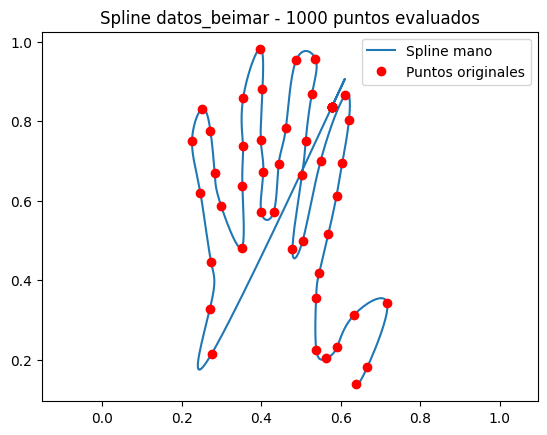

In [64]:

import numpy as np

datos_nombre = "datos_beimar"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy")  # Debe contener [(x0, y0), (x1, y1), ...]
x, y = zip(*data)
x = np.array(x)
y = np.array(y)

# Seleccionar 20 índices aleatorios sin repetición
num_eliminar = 20
if len(x) > num_eliminar:
    indices = np.random.choice(len(x), num_eliminar, replace=False)
    print(indices)
    # Crear nuevos arrays sin los índices seleccionados
    x = np.delete(x, indices)
    y = np.delete(y, indices)
else:
    print("El array tiene menos de 20 elementos, no se puede eliminar.")

# Si necesitas guardar los datos modificados:
# np.save("datos_filtrados.npy", np.column_stack((x, y)))

# Definir t
n = len(x)
t = np.arange(n)

# Construir los splines paramétricos
splineX, _ = spline_cubico_natural(t, x)
splineY, _ = spline_cubico_natural(t, y)

# Evaluar en varios puntos
puntos = 1000
t_eval = np.linspace(t[0], t[-1], puntos)
X_eval = splineX(t_eval)
Y_eval = splineY(t_eval)

# Graficar
plt.figure()
plt.plot(X_eval, Y_eval, label='Spline mano')
plt.plot(x, y, 'ro', label='Puntos originales')
plt.axis('equal')
plt.legend()
titulo = f"Spline {datos_nombre} - {puntos} puntos evaluados"
plt.title(titulo)

# Guardar imagen
#filename = f"spline_{datos_nombre}_{puntos}.png"
#plt.savefig(filename, dpi=300)
plt.show()

# print(f"Gráfico guardado como {filename}")


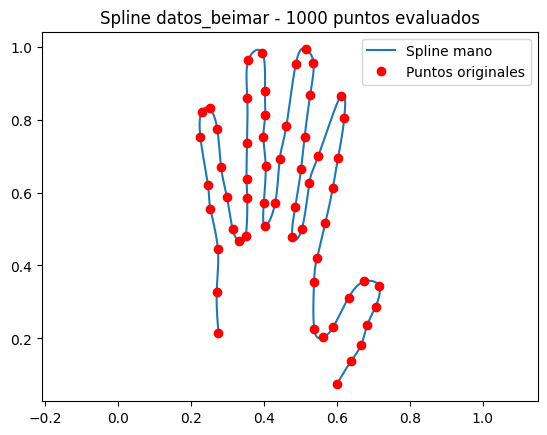

In [84]:
datos_nombre = "datos_beimar"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy")  # Debe contener [(x0, y0), (x1, y1), ...]
x, y = zip(*data)
x = np.array(x)
y = np.array(y)

# Definir cuántos elementos eliminar
num_eliminar = 16

if len(x) > num_eliminar:
    # Eliminar los primeros 10 elementos
    x = x[num_eliminar:]
    y = y[num_eliminar:]
else:
    print("El array tiene menos de 10 elementos, no se puede eliminar.")



# Definir t
n = len(x)
t = np.arange(n)

# Construir los splines paramétricos
splineX, _ = spline_cubico_natural(t, x)
splineY, _ = spline_cubico_natural(t, y)

# Evaluar en varios puntos
puntos = 1000
t_eval = np.linspace(t[0], t[-1], puntos)
X_eval = splineX(t_eval)
Y_eval = splineY(t_eval)

# Graficar
plt.figure()
plt.plot(X_eval, Y_eval, label='Spline mano')
plt.plot(x, y, 'ro', label='Puntos originales')
plt.axis('equal')
plt.legend()
titulo = f"Spline {datos_nombre} - {puntos} puntos evaluados"
plt.title(titulo)

# Guardar imagen
#filename = f"spline_{datos_nombre}_{puntos}.png"
#plt.savefig(filename, dpi=300)
plt.show()

In [116]:
datos_nombre = "datos_eguar"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy") 


In [117]:
print(data, len(data))

[[0.20064725 0.14311759]
 [0.2227616  0.28896992]
 [0.25566343 0.43938013]
 [0.26914779 0.53509572]
 [0.28317152 0.68459435]
 [0.29773463 0.78304467]
 [0.33171521 0.87146764]
 [0.34573894 0.86235187]
 [0.34951456 0.79671832]
 [0.33333333 0.65998177]
 [0.32254585 0.50957156]
 [0.34088457 0.51048314]
 [0.37432578 0.63810392]
 [0.41154261 0.81859617]
 [0.44282632 0.90610757]
 [0.48813376 0.95350957]
 [0.49676375 0.91886964]
 [0.46709817 0.79489517]
 [0.44228695 0.72288058]
 [0.43149946 0.6390155 ]
 [0.41693635 0.57793984]
 [0.41909385 0.5515041 ]
 [0.44066882 0.62807657]
 [0.46763754 0.71376481]
 [0.48867314 0.79671832]
 [0.50970874 0.87876026]
 [0.52696872 0.94530538]
 [0.56148867 0.97447584]
 [0.57119741 0.9443938 ]
 [0.56796117 0.8769371 ]
 [0.54746494 0.80309936]
 [0.52265372 0.72561531]
 [0.50701187 0.62534184]
 [0.49244876 0.56882407]
 [0.47734628 0.50319052]
 [0.48651564 0.4721969 ]
 [0.52481122 0.54694622]
 [0.55717368 0.61349134]
 [0.58522114 0.68915223]
 [0.62028047 0.76845943]


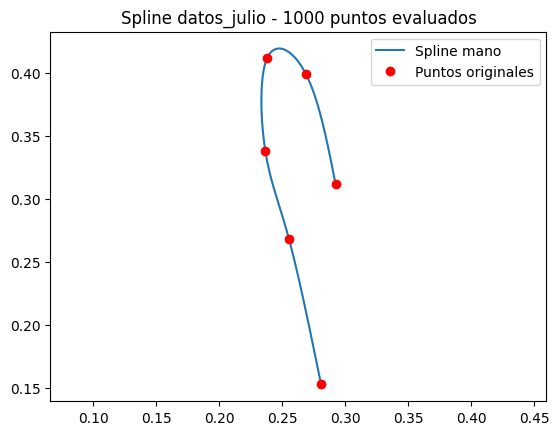

In [ ]:
datos_nombre = "datos_julio"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy")  # Debe contener [(x0, y0), (x1, y1), ...]
x, y = zip(*data)
x = np.array(x)
y = np.array(y)

# Definir cuántos elementos eliminar
num_eliminar = 0

if len(x) > num_eliminar:
    # Eliminar los primeros 10 elementos
    x = x[num_eliminar:]
    y = y[num_eliminar:]
else:
    print("El array tiene menos de 10 elementos, no se puede eliminar.")



# Definir t
n = len(x)
t = np.arange(n)

# Construir los splines paramétricos
splineX, _ = spline_cubico_natural(t, x)
splineY, _ = spline_cubico_natural(t, y)

# Evaluar en varios puntos
puntos = 1000
t_eval = np.linspace(t[0], t[-1], puntos)
X_eval = splineX(t_eval)
Y_eval = splineY(t_eval)

# Graficar
plt.figure()
plt.plot(X_eval, Y_eval, label='Spline mano')
plt.plot(x, y, 'ro', label='Puntos originales')
plt.axis('equal')
plt.legend()
titulo = f"Spline {datos_nombre} - {puntos} puntos evaluados"
plt.title(titulo)

# Guardar imagen
#filename = f"spline_{datos_nombre}_{puntos}.png"
#plt.savefig(filename, dpi=300)
plt.show()

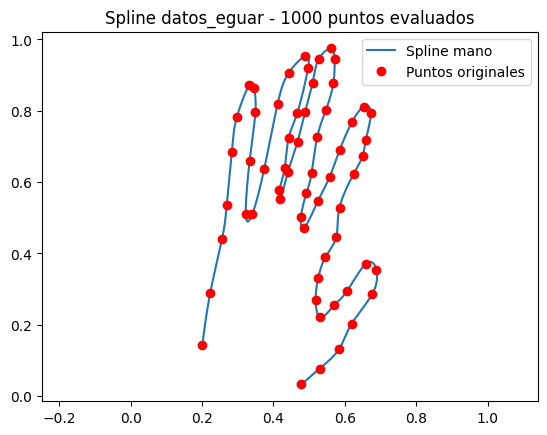

In [93]:
datos_nombre = "datos_eguar"  # Nombre identificador
data = np.load(f"{datos_nombre}.npy")  # Debe contener [(x0, y0), (x1, y1), ...]
x, y = zip(*data)
x = np.array(x)
y = np.array(y)

# Definir cuántos elementos eliminar
num_eliminar = 1

if len(x) > num_eliminar:
    # Eliminar los primeros 10 elementos
    x = x[:-num_eliminar]
    y = y[:-num_eliminar]
else:
    print("El array tiene menos de 10 elementos, no se puede eliminar.")



# Definir t
n = len(x)
t = np.arange(n)

# Construir los splines paramétricos
splineX, _ = spline_cubico_natural(t, x)
splineY, _ = spline_cubico_natural(t, y)

# Evaluar en varios puntos
puntos = 1000
t_eval = np.linspace(t[0], t[-1], puntos)
X_eval = splineX(t_eval)
Y_eval = splineY(t_eval)

# Graficar
plt.figure()
plt.plot(X_eval, Y_eval, label='Spline mano')
plt.plot(x, y, 'ro', label='Puntos originales')
plt.axis('equal')
plt.legend()
titulo = f"Spline {datos_nombre} - {puntos} puntos evaluados"
plt.title(titulo)

# Guardar imagen
filename = f"spline_{datos_nombre}_{puntos}.png"
plt.savefig(filename, dpi=300)
plt.show()

In [109]:
import numpy as np

def area_gauss(x, y):
    """
    Calcula el área de un polígono definido por los puntos (x[i], y[i])
    usando la fórmula de Gauss (shoelace).
    Asume que (x, y) describen el contorno en orden.
    """
    n = len(x)
    area_sum = 0.0
    
    # Sumamos x[i]*y[i+1] - x[i+1]*y[i] para i=0..n-2
    for i in range(n-1):
        area_sum += x[i] * y[i+1] - x[i+1] * y[i]
    
    # Agregamos la conexión del último punto con el primero
    area_sum += x[n-1] * y[0] - x[0] * y[n-1]
    
    return 0.5 * abs(area_sum)

# ------------------------------------------------------------------------
# USO
# ------------------------------------------------------------------------
if __name__ == "__main__":
    # Cargar los puntos de la mano (x,y) en orden
    points = np.load("datos_beimar.npy")  # array (n, 2) o lista de tuplas
    # Ej.: points = [(x0, y0), (x1, y1), ..., (x_{n-1}, y_{n-1})]
    
    # Separar en x e y
    x, y = zip(*points)  # x e y son tuplas
    x = np.array(x)
    y = np.array(y)
    num_eliminar = 16

    if len(x) > num_eliminar:
        # Eliminar los primeros 10 elementos
        x = x[num_eliminar:]
        y = y[num_eliminar:]
    else:
        print("El array tiene menos de 10 elementos, no se puede eliminar.")


    
    # Calcular el área
    A = area_gauss(x, y) * 27**2
    print("Área estimada de la mano:", A)


Área estimada de la mano: 145.08722648390338


In [107]:
import numpy as np

def area_gauss(x, y):
    """
    Calcula el área de un polígono definido por los puntos (x[i], y[i])
    usando la fórmula de Gauss (shoelace).
    Asume que (x, y) describen el contorno en orden.
    """
    n = len(x)
    area_sum = 0.0
    
    # Sumamos x[i]*y[i+1] - x[i+1]*y[i] para i=0..n-2
    for i in range(n-1):
        area_sum += x[i] * y[i+1] - x[i+1] * y[i]
    
    # Agregamos la conexión del último punto con el primero
    area_sum += x[n-1] * y[0] - x[0] * y[n-1]
    
    return 0.5 * abs(area_sum)

# ------------------------------------------------------------------------
# USO
# ------------------------------------------------------------------------
if __name__ == "__main__":
    # Cargar los puntos de la mano (x,y) en orden
    points = np.load("datos_eguar.npy")  # array (n, 2) o lista de tuplas
    # Ej.: points = [(x0, y0), (x1, y1), ..., (x_{n-1}, y_{n-1})]
    
    # Separar en x e y
    x, y = zip(*points)  # x e y son tuplas
    x = np.array(x)
    y = np.array(y)
    num_eliminar = 1

    if len(x) > num_eliminar:
        # Eliminar los primeros 10 elementos
        x = x[:-num_eliminar]
        y = y[:-num_eliminar]
    else:
        print("El array tiene menos de 10 elementos, no se puede eliminar.")


    
    # Calcular el área
    A = area_gauss(x, y) * 27**2
    print("Área estimada de la mano:", A)


Área estimada de la mano: 173.02530068766544
